# Web scraping algorithm to compile all of the 2019-2020 NBA player statistics into an excel spreadsheet. All statistics are on a per game basis.

In [35]:
import requests 
import csv 
from bs4 import BeautifulSoup

# Create a file to write
f = csv.writer(open('nba_statistics.csv', 'w', encoding = "utf-8")) 

page = requests.get("https://www.basketball-reference.com/leagues/NBA_2020_per_game.html")

soup = BeautifulSoup(page.text, 'html.parser')

table = soup.find("div", {"class": "overthrow table_container"})

header = table.find("thead")
header_elements = header.find_all("th")
header_elements = [head.text for head in header_elements[1:]]
f.writerow(header_elements)

row_elements = table.find_all("tr", {"class": "full_table"})
for row in row_elements:
    data_elements = row.find_all("td")
    data_elements = [data.text for data in data_elements]
    f.writerow(data_elements)

# Start of Data Visualization

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('nba_statistics.csv')
print("Small Sample from the Top of the Data File: \n")
print(data.head())
frame = pd.DataFrame(data)

Small Sample from the Top of the Data File: 

                     Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0              Steven Adams   C   26  OKC  58  58  27.0  4.5   7.6  0.591   
1               Bam Adebayo  PF   22  MIA  65  65  34.4  6.3  11.1  0.567   
2         LaMarcus Aldridge   C   34  SAS  53  53  33.1  7.4  15.0  0.493   
3  Nickeil Alexander-Walker  SG   21  NOP  41   0  12.2  1.9   5.5  0.339   
4             Grayson Allen  SG   24  MEM  30   0  16.6  2.6   5.9  0.449   

   ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  ...  0.590  3.4  6.0   9.4  2.4  0.9  1.1  1.5  1.9  10.9  
1  ...  0.690  2.5  8.0  10.5  5.1  1.2  1.3  2.8  2.5  16.2  
2  ...  0.827  1.9  5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9  
3  ...  0.607  0.2  1.8   2.0  1.8  0.3  0.2  1.0  1.1   5.1  
4  ...  0.857  0.2  2.0   2.2  1.4  0.2  0.0  0.8  1.2   7.4  

[5 rows x 29 columns]


# Table of players 35 years old and above

In [8]:
def data_subset():
    print('Starts of Players over 35')
    print('Player:           | Starts:')
    print('------------------+--------')
    for index, row in frame.iterrows():
        if row['Age'] >= 35:
            print('{:<17} | {:>6}'.format(row['Player'], row['GS']))

In [9]:
data_subset()

Starts of Players over 35
Player:           | Starts:
------------------+--------
Carmelo Anthony   |     50
J.J. Barea        |      4
Vince Carter      |      0
Tyson Chandler    |      5
Marc Gasol        |     35
Udonis Haslem     |      0
Andre Iguodala    |      0
LeBron James      |     60
Kyle Korver       |      0
J.J. Redick       |     35
Thabo Sefolosha   |      0


# Graph of Offensive Rebounds and Minutes Played

In [24]:
def graph_ORB():
    plt.figure(figsize=[8,8])
    sns.set()
    sns.regplot(x=frame['MP'], y=frame['ORB'], color = '#ff33ff', marker = '+')
    plt.xlabel('Minutes Played (per game)', fontsize='15', color='black')
    plt.ylabel('Offensive Rebounds (per game)', fontsize=15, color='black')
    plt.title('Minutes Played vs. Offensive Rebounds', fontsize=20)
    plt.savefig('graph.png')
    plt.show()

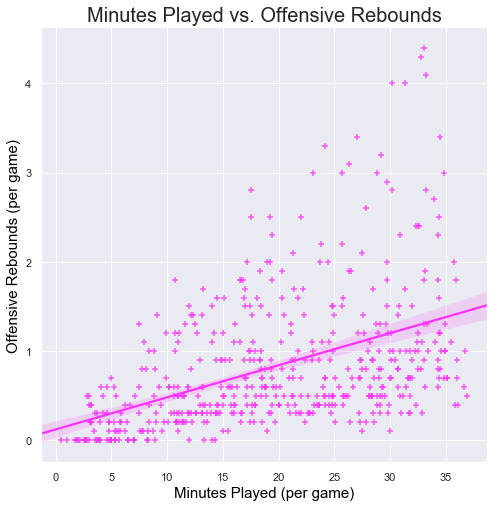

In [25]:
graph_ORB()

# Graph of Defensive Rebounds and Minutes Played

In [26]:
def graph_DRB():
    plt.figure(figsize=[8,8])
    sns.set()
    sns.regplot(x=frame['MP'], y=frame['DRB'], color = '#ff33ff', marker = '+')
    plt.xlabel('Minutes Played (per game)', fontsize='15', color='black')
    plt.ylabel('Defensive Rebounds (per game)', fontsize=15, color='black')
    plt.title('Minutes Played vs. Defensive Rebounds', fontsize=20)
    plt.savefig('graph.png')
    plt.show()

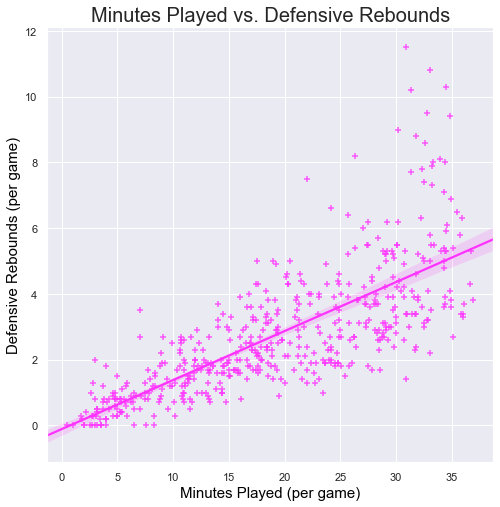

In [27]:
graph_DRB()